# AirBnb Boston Data

In [1]:
## importing the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
## reading the data into dataframes

listing = pd.read_csv("listings.csv")
cal = pd.read_csv("calendar.csv", parse_dates = ['date'])
review = pd.read_csv("reviews.csv", parse_dates = ['date'])

#### Data Exploration

Text(0.5,1,'What types of properties are listed in Boston?')

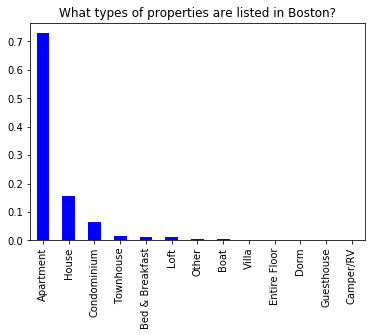

In [3]:
## Looking at the type of Properties listed for accommodation

Property_types = listing.property_type.value_counts()
(Property_types/listing.shape[0]).plot(kind="bar", color='blue')
plt.title('What types of properties are listed in Boston?')

Entire home/apt    0.593305
Private room       0.384379
Shared room        0.022315
Name: room_type, dtype: float64


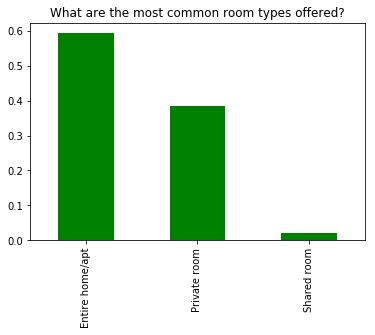

In [4]:
## Looking at the type of rooms offered for accommodation
Room_types = listing.room_type.value_counts()
(Room_types/listing.shape[0]).plot(kind="bar", color = 'green')
plt.title('What are the most common room types offered?')
print((Room_types/listing.shape[0]))

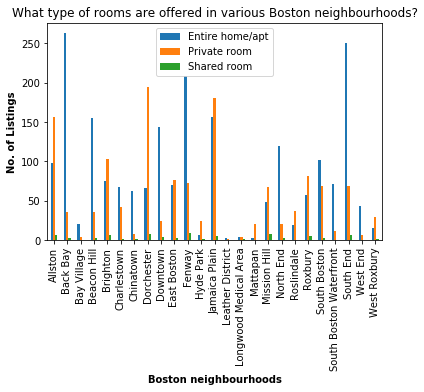

In [5]:
## Understanding the room type offered in various neighbourhoods
listing_neighbourhood = listing.groupby(['neighbourhood_cleansed','room_type'], as_index=False)['id'].count()

listing_neighbourhood.pivot("neighbourhood_cleansed","room_type","id").plot(kind='bar')
plt.title('What type of rooms are offered in various Boston neighbourhoods?')
plt.xlabel('Boston neighbourhoods',fontweight='bold')
plt.ylabel('No. of Listings',fontweight='bold')
plt.legend()
plt.show()

In [6]:
listing['price'] = listing['price'].str.replace('$','').str.replace(',','').astype(float)
listing_neighbourhood_price = listing.groupby('neighbourhood_cleansed', as_index=False)['price'].mean().sort_values(by=['price'], ascending=False)
listing_neighbourhood_price

,neighbourhood_cleansed,price
21,South Boston Waterfront,306.060241
2,Bay Village,266.833333
13,Leather District,253.600000
1,Back Bay,240.950331
8,Downtown,236.459302
6,Chinatown,232.352113
3,Beacon Hill,224.443299
10,Fenway,220.393103
23,West End,209.591837
22,South End,204.349693


## Seasonality Analysis

#### Demand

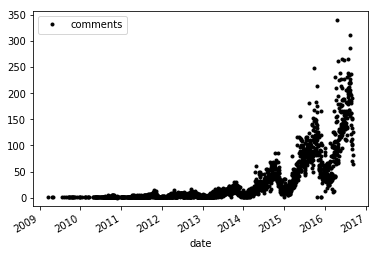

In [7]:
## Understanding the demand over time based on the reviews
number_of_reviews = review.groupby(['date'], as_index=True)['comments'].count().to_frame()
number_of_reviews.plot(style='k.')
plt.show()

Text(0.5,1,'Monthly trends in demand over the years')

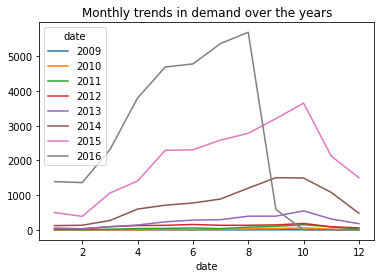

In [8]:
## Does the demand for accommodation vary over seasons/months?
review_pivot = pd.pivot_table(number_of_reviews, index=number_of_reviews.index.month, columns=number_of_reviews.index.year,
                    values='comments', aggfunc='sum')
fill_0 = lambda col: col.fillna(0)
review_pivot = review_pivot.apply(fill_0, axis=0)
review_pivot.plot()
plt.title('Monthly trends in demand over the years')

C:\Users\kritigarg3\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


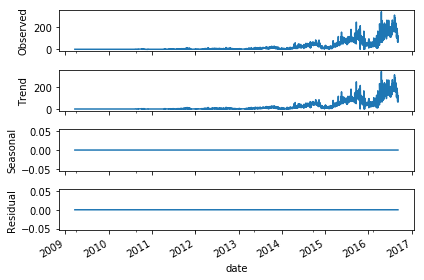

In [9]:
## Can we find any seasonality in the demand?
result = seasonal_decompose(number_of_reviews, model='additive', freq=1)
result.plot()
plt.show()

#### Supply

In [10]:
cal.shape

(1308890, 4)

In [11]:
## dropping all the records without price info
cal = cal.dropna(how='any')
cal.shape

(643037, 4)

###### Out of the total data, only 50% has the price information

However, we can't assess the prices without the information on prices. We also can't mark impute them as zero. So, for now, I have dropped that data from the analysis.

In [12]:
## convert price to a float variable
cal['price'] = cal['price'].str.replace('$','').str.replace(',','').astype(float)


In [13]:
cal.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0


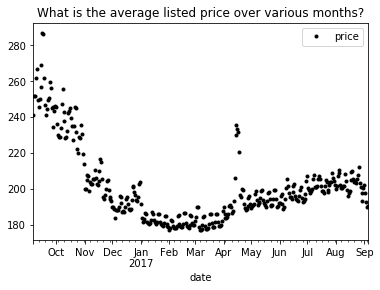

In [14]:
cal_price = cal.groupby(['date'], as_index=True)['price'].mean().to_frame()
cal_price.plot(style='k.')
plt.title('What is the average listed price over various months?')
plt.show()